# >>>Applied Statistics and Inference Assignment.

1. What are Type I and Type II errors in hypothesis testing, and how do they
impact decision-making?
   - Type I Error (False Positive)>>Meaning: Rejecting the null hypothesis when it is actually true. If Type I error happens, we take a wrong action because we believe something changed or worked when it actually didn’t. This can lead to unnecessary costs, wrong policies, or incorrect conclusions.
   - Type II Error (False Negative)>>Meaning: Failing to reject the null hypothesis when it is actually false. If Type II error happens, we miss out on a real effect or important change. This can delay treatments, cause safety issues, or lead to wrong conclusions that nothing is happening.

2. What is the P-value in hypothesis testing, and how should it be interpreted
in the context of the null hypothesis?
   - The P-value is a number that helps us decide whether to reject the null hypothesis (H₀). The P-value is the probability of getting the observed data (or something more extreme) assuming that the null hypothesis is true.
   -  How to Interpret the P-value:
        - If P-value is small (≤ significance level α, usually 0.05): The sample result is very unlikely under the null hypothesis.
        Conclusion: Reject the null hypothesis.
        - If P-value is large (> α): The sample result is likely or reasonable under the null hypothesis.
        Conclusion: Do NOT reject the null hypothesis.

3. Explain the difference between a Z-test and a T-test, including when to use
each.
   - A Z-test and a T-test are both statistical tests used to compare sample data with population information, but they are used in different situations.
     - When to use:
     Z-test:
     When the sample size is large (n > 30).
     When the population standard deviation (σ) is known.
     When data is approximately normally distributed.
     - When to use: T-test:
     When the sample size is small (n ≤ 30).
     When the population standard deviation is unknown.
     When the data is from a normally distributed population.

4. What is a confidence interval, and how does the margin of error influence
its width and interpretation?
   - A confidence interval (CI) is a range of values that is likely to contain the true population parameter (such as the mean or proportion).
   
   The margin of error (MoE) is the amount added and subtracted from the sample estimate to create the interval.
   > Larger Margin of Error → Wider Confidence Interval.
   > Smaller Margin of Error → Narrower Confidence Interval.

      - The margin of error controls the width of that range— bigger MoE means less precision, smaller MoE means more precision.

5. Describe the purpose and assumptions of an ANOVA test. How does it
extend hypothesis testing to more than two groups?
   - The purpose of ANOVA is to test whether three or more groups have significantly different means.
   - Assumptions of an ANOVA test:
    1. Independence of observations>>Data in each group must be collected independently.
    2. Normality>>The data in each group should be approximately normally distributed.
    3. Homogeneity of variances (Equal variances)>>All groups should have similar variances.
       - ANOVA Extends Hypothesis Testing to More Than Two Groups
            - When comparing two means, we use a t-test.
            - But when comparing three or more means, using multiple t-tests increases the chance of Type I error.
            - ANOVA solves this problem by testing all group means together in one statistical test.






6. Write a Python program to perform a one-sample Z-test and interpret the
result for a given dataset.

In [7]:
import numpy as np
from math import sqrt
from scipy.stats import norm

# Sample dataset
data = [52, 55, 49, 50, 53, 54, 48, 51, 56, 52]
population_mean = 50
population_std = 4

# Sample statistics
sample_mean = np.mean(data)
sample_size = len(data)

# Z-test formula
z_value = (sample_mean - population_mean) / (population_std / sqrt(sample_size))

# P-value for two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_value)))

print("Sample Mean:", sample_mean)
print("Z-value:", z_value)
print("P-value:", p_value)

# Interpretation at α = 0.05
alpha = 0.05

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis (H0).")
    print("There is significant evidence that the sample mean is different from the population mean.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0).")
    print("There is NOT enough evidence to say the sample mean differs from the population mean.")

Sample Mean: 52.0
Z-value: 1.5811388300841895
P-value: 0.11384629800665813
Conclusion: Fail to reject the null hypothesis (H0).
There is NOT enough evidence to say the sample mean differs from the population mean.


7. Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using
NumPy and plot the histogram.


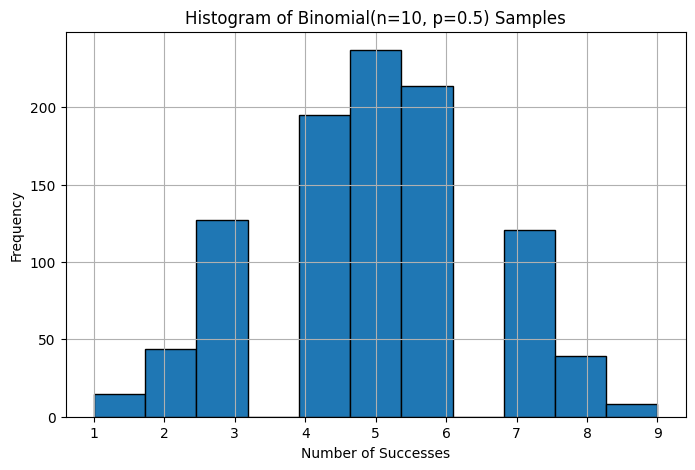

In [8]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.binomial(n=10, p=0.5, size=1000)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(data, bins=11, edgecolor='black')
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title("Histogram of Binomial(n=10, p=0.5) Samples")
plt.grid(True)
plt.show()

8.  Generate multiple samples from a non-normal distribution and implement
the Central Limit Theorem using Python

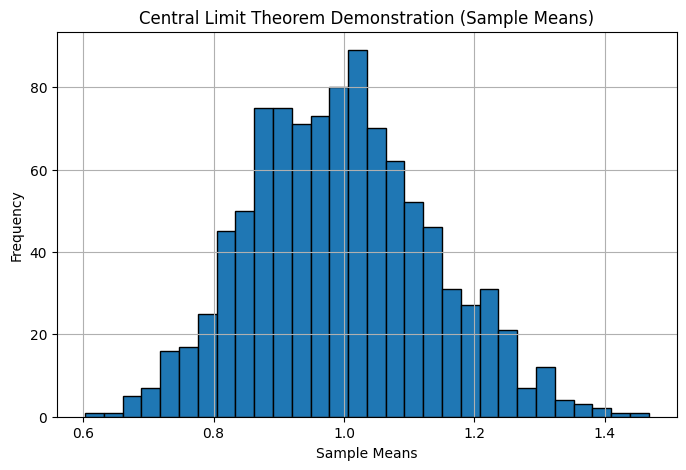

In [9]:
import numpy as np
import matplotlib.pyplot as plt
population = np.random.exponential(scale=1.0, size=100000)


sample_size = 50
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)

# Step 3: Plot histogram of sample means to show CLT
plt.figure(figsize=(8,5))
plt.hist(sample_means, bins=30, edgecolor='black')
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.title("Central Limit Theorem Demonstration (Sample Means)")
plt.grid(True)
plt.show()

9. Write a Python function to calculate and visualize the confidence interval
for a sample mean.


Sample Mean: 14.7000
95% Confidence Interval: (13.5295, 15.8705)


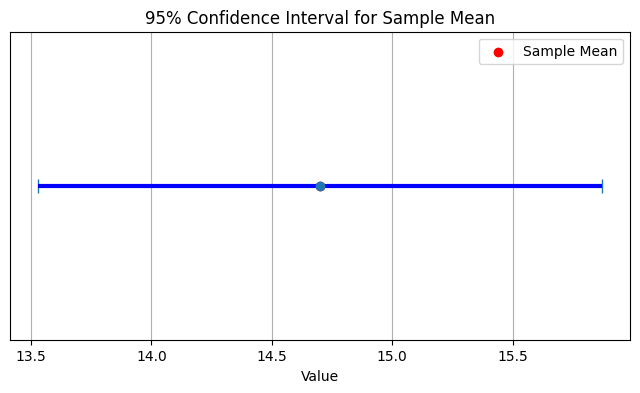

(np.float64(14.7),
 np.float64(13.529478615011994),
 np.float64(15.870521384988004))

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def confidence_interval_plot(data, confidence=0.95):


    data = np.array(data)


    mean = np.mean(data)
    std = np.std(data, ddof=1)
    n = len(data)

    # Z-value for confidence level
    z = norm.ppf((1 + confidence) / 2)

    # Margin of error
    margin = z * (std / np.sqrt(n))

    # Confidence interval
    lower = mean - margin
    upper = mean + margin

    print(f"Sample Mean: {mean:.4f}")
    print(f"{int(confidence*100)}% Confidence Interval: ({lower:.4f}, {upper:.4f})")

    # Visualization
    plt.figure(figsize=(8, 4))
    plt.errorbar(mean, 0, xerr=margin, fmt='o', capsize=5)
    plt.hlines(0, lower, upper, colors='blue', linewidth=3)
    plt.scatter(mean, 0, color='red', label="Sample Mean")
    plt.title(f"{int(confidence*100)}% Confidence Interval for Sample Mean")
    plt.yticks([])
    plt.xlabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

    return mean, lower, upper


# Example usage:
data = [12, 14, 15, 13, 16, 18, 14, 15, 17, 13]
confidence_interval_plot(data, confidence=0.95)


10.  Perform a Chi-square goodness-of-fit test using Python to compare
observed and expected distributions, and explain the outcome.


In [11]:
import numpy as np
from scipy.stats import chisquare


observed = np.array([25, 30, 20, 25])


expected = np.array([25, 25, 25, 25])

chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square Statistic:", chi_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("Observed distribution is significantly different from expected.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference between observed and expected distributions.")


Chi-square Statistic: 2.0
P-value: 0.5724067044708798
Conclusion: Fail to reject the null hypothesis.
There is no significant difference between observed and expected distributions.
